# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Loading The Data Set
* Assigning column names

In [ ]:
dd = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1")
dd.columns = ['sentiment','id','date','query','special','text']
dd.head()

,sentiment,id,date,query,special,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Dropping Few Columns

In [ ]:
dd.drop(['id','date','query','special'],axis = 1,inplace = True)

In [ ]:
df = dd.sample(100000)

# Basic Preprocessing
* Removing unwanted elements like '@' , ',' as they dont add any value.
* (Stopwords)Removing the words which does not add any meaning.

In [ ]:
df['Cleaned'] = df['text'].str.replace('@','')
df['Cleaned'] = df['Cleaned'].str.replace(r'http\S+','')
df['Cleaned'] = df['Cleaned'].str.replace('[^a-zA-Z]',' ')

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
df['Cleaned'] = df['Cleaned'].apply(lambda text : remove_stopwords(text.lower()))
df['Cleaned'] = df['Cleaned'].apply(lambda x : x.split())

In [ ]:
df.head()

,sentiment,text,Cleaned
1370338,4,@mmh807 Going to NJ to escape the motorcycle c...,"[mmh, going, nj, escape, motorcycle, convention]"
1011051,4,@hot30 more people need to vote for Short Stac...,"[hot, people, need, vote, short, stack, sway, ..."
89492,0,I don't wanna go to work today... Or anyday.....,"[wanna, go, work, today, anyday, win, lottery]"
133224,0,says he is so lonely today http://plurk.com/p...,"[says, lonely, today]"
800908,4,i... just belted 'a dark congregation' for no ...,"[belted, dark, congregation, reason, think, go..."


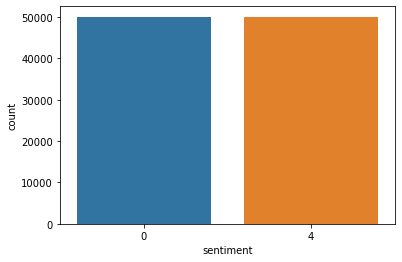

In [ ]:
sns.countplot(df.sentiment)

# Lemmatization

In [ ]:
wordnet=WordNetLemmatizer()
df['Cleaned'] = df['Cleaned'].apply(lambda x : [wordnet.lemmatize(i) for i in x])

In [ ]:
df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x]))

In [ ]:
df['Cleaned'] = df['Cleaned'].apply(lambda x : ' '.join([w for w in x.split()]))

In [ ]:
df.head()

,sentiment,text,Cleaned
1370338,4,@mmh807 Going to NJ to escape the motorcycle c...,mmh going nj escape motorcycle convention
1011051,4,@hot30 more people need to vote for Short Stac...,hot people need vote short stack sway sway bab...
89492,0,I don't wanna go to work today... Or anyday.....,wanna go work today anyday win lottery
133224,0,says he is so lonely today http://plurk.com/p...,say lonely today
800908,4,i... just belted 'a dark congregation' for no ...,belted dark congregation reason think got back...


# Bag of Words

In [ ]:
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(df['Cleaned']).toarray()
x.shape

(100000, 2500)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,df['sentiment'],test_size = 0.2,random_state = 42)

# Model Building
* Random Forest
* Logistic Regression

# Random Forest

In [ ]:
%%time
model = RandomForestClassifier()
model.fit(x_train,y_train)

CPU times: user 12min 33s, sys: 856 ms, total: 12min 34s
Wall time: 12min 34s


RandomForestClassifier()

In [ ]:
model.score(x_train,y_train)

0.9786

In [ ]:
model.score(x_test,y_test)

0.7336

# Log Regression

In [ ]:
%%time
reg = LogisticRegression()
reg.fit(x_train,y_train)

CPU times: user 48.3 s, sys: 871 ms, total: 49.2 s
Wall time: 25.4 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
reg.score(x_train,y_train)

0.7692125

In [ ]:
reg.score(x_test,y_test)

0.7515

# Tf-Idf

In [ ]:
tf = TfidfVectorizer(max_features = 2500)
z = tf.fit_transform(df['Cleaned']).toarray()
z.shape

(100000, 2500)

In [ ]:
z_train,z_test,y_train,y_test = train_test_split(z,df['sentiment'],test_size = 0.2,random_state = 42)

# Random Forest

In [ ]:
%%time
model1 = RandomForestClassifier()
model1.fit(z_train,y_train)

CPU times: user 16min 42s, sys: 1.19 s, total: 16min 43s
Wall time: 16min 44s


RandomForestClassifier()

In [ ]:
model1.score(z_train,y_train)

0.97845

In [ ]:
model1.score(z_test,y_test)

0.74

# Log Regression


In [ ]:
%%time
reg1 = LogisticRegression()
reg1.fit(z_train,y_train)

CPU times: user 20.1 s, sys: 38 ms, total: 20.1 s
Wall time: 10.2 s


LogisticRegression()

In [ ]:
reg1.score(z_train,y_train)

0.7708

In [ ]:
reg1.score(z_test,y_test)

0.7542

# Plotting all the scores

In [ ]:
scores = pd.DataFrame({'Bow(RF)': model.score(x_test,y_test),
                       'Bow(LR)': reg.score(x_test,y_test),
                       'TF(RF)': model1.score(z_test,y_test),
                       'TF(LR)': reg1.score(z_test,y_test)},
                      index = [0])

In [ ]:
scores

,Bow(RF),Bow(LR),TF(RF),TF(LR)
0,0.7336,0.7515,0.74,0.7542


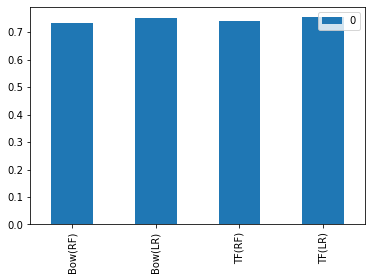

In [ ]:
scores.T.plot(kind = 'bar')